In [1]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', 'UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.evaluation.metrics import calculate_all_metrics

Quick check that working directory and train basin file exists:

In [5]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("warm springs"))

Current Working Directory: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all
Train Basin File Exists: True


In [53]:
path_to_csv = Path("/Users/mia/research/russian_river_data_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
params = {
    "epochs":32
}
lstmNoPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [54]:
lstmNoPhysics.train()

2024-12-01 15:32:43,918: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0112_153243/output.log initialized.
2024-12-01 15:32:43,963: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0112_153243
2024-12-01 15:32:43,966: ### Run configurations for testing_run
2024-12-01 15:32:43,971: experiment_name: testing_run
2024-12-01 15:32:43,976: train_basin_file: warm springs
2024-12-01 15:32:43,980: validation_basin_file: warm springs
2024-12-01 15:32:43,983: test_basin_file: warm springs
2024-12-01 15:32:43,995: train_start_date: 1994-10-01 00:00:00
2024-12-01 15:32:44,002: train_end_date: 2002-09-30 00:00:00
2024-12-01 15:32:44,005: validation_start_date: 2002-10-01 00:00:00
2024-12-01 15:32:44,008: validation_end_date: 2005-09-30 00:00:00
2024-12-01 15:32:44,014: test_start_date: 2005-10-01 00:00:00
2024-12-01 15:32:44,020: test_end_date: 2009-09-30 00:00:00
2024-12-01 15:32:

Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


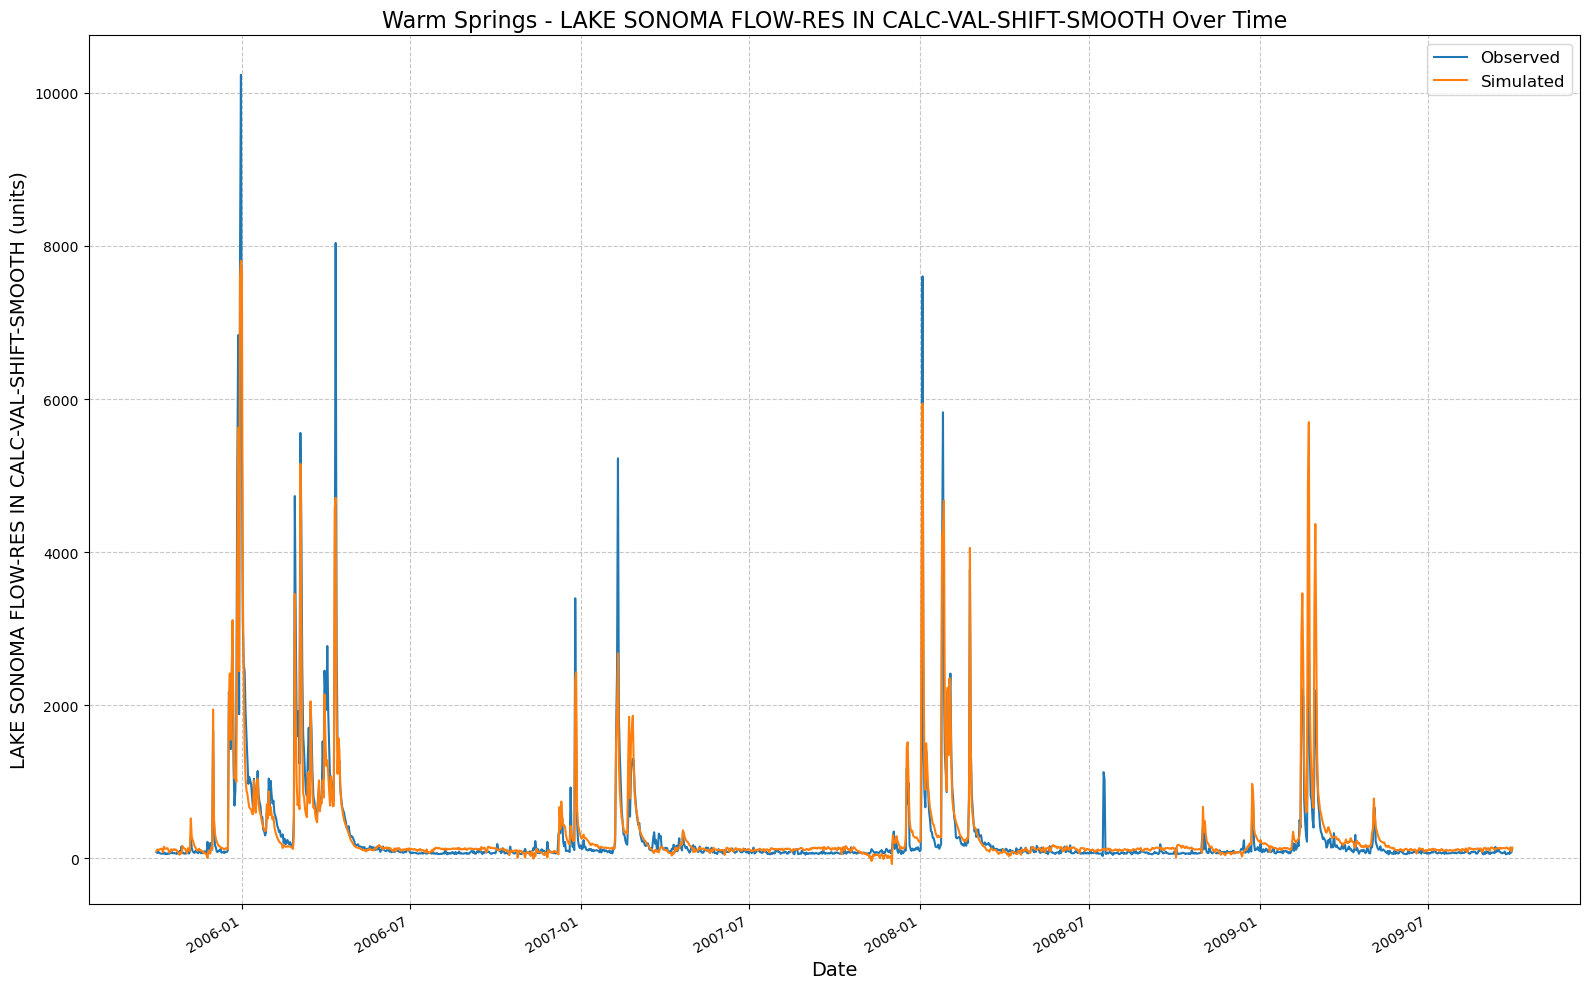

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0112_153243/results_output.csv


{'NSE': 0.8502790033817291,
 'MSE': 80123.859375,
 'RMSE': 283.06158230144905,
 'KGE': 0.875381850761324,
 'Alpha-NSE': 0.9396952959964704,
 'Beta-KGE': 1.0770195722579956,
 'Beta-NSE': 0.03132279830152836,
 'Pearson-r': 0.9227924143369642,
 'FHV': -1.0382849723100662,
 'FMS': -11.63853559756178,
 'FLV': -2249.8062559332443,
 'Peak-Timing': 0.16666666666666666,
 'Peak-MAPE': 51.71722173690796}

In [55]:
lstmNoPhysics.results()

Now run physics informed lstm with HMS data:

In [11]:
path_to_csv = Path("/Users/mia/research/russian_river_data_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
path_to_physics_data = Path("/Users/mia/research/russian_river_data_folder/WarmSprings_Inflow_daily.csv")
params = {
    "epochs":32
}
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-CANOPY combined', 'Dry Creek 20 FLOW combined',
    'Dry Creek 20 FLOW-BASE combined', 'Dry Creek 20 INFILTRATION combined',
    'Dry Creek 20 PERC-SOIL combined',
    'Dry Creek 20 SATURATION FRACTION combined',
    'Dry Creek 30 ET-POTENTIAL combined', 'Dry Creek 30 FLOW combined',
    'Dry Creek 30 FLOW-BASE combined', 'Dry Creek 30 INFILTRATION combined',
    'Dry Creek 30 PERC-SOIL combined',
    'Dry Creek 30 SATURATION FRACTION combined',
    'Warm Springs Dam Inflow FLOW combined',
    ]
lstmPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data)

In [12]:
lstmPhysics.train()

2024-12-08 15:01:19,680: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0812_150119/output.log initialized.
2024-12-08 15:01:19,684: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0812_150119
2024-12-08 15:01:19,687: ### Run configurations for testing_run
2024-12-08 15:01:19,688: experiment_name: testing_run
2024-12-08 15:01:19,691: train_basin_file: warm springs
2024-12-08 15:01:19,694: validation_basin_file: warm springs
2024-12-08 15:01:19,696: test_basin_file: warm springs
2024-12-08 15:01:19,698: train_start_date: 1994-10-01 00:00:00
2024-12-08 15:01:19,702: train_end_date: 2002-09-30 00:00:00
2024-12-08 15:01:19,703: validation_start_date: 2002-10-01 00:00:00
2024-12-08 15:01:19,706: validation_end_date: 2005-09-30 00:00:00
2024-12-08 15:01:19,708: test_start_date: 2005-10-01 00:00:00
2024-12-08 15:01:19,710: test_end_date: 2009-09-30 00:00:00
2024-12-08 15:01:

Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


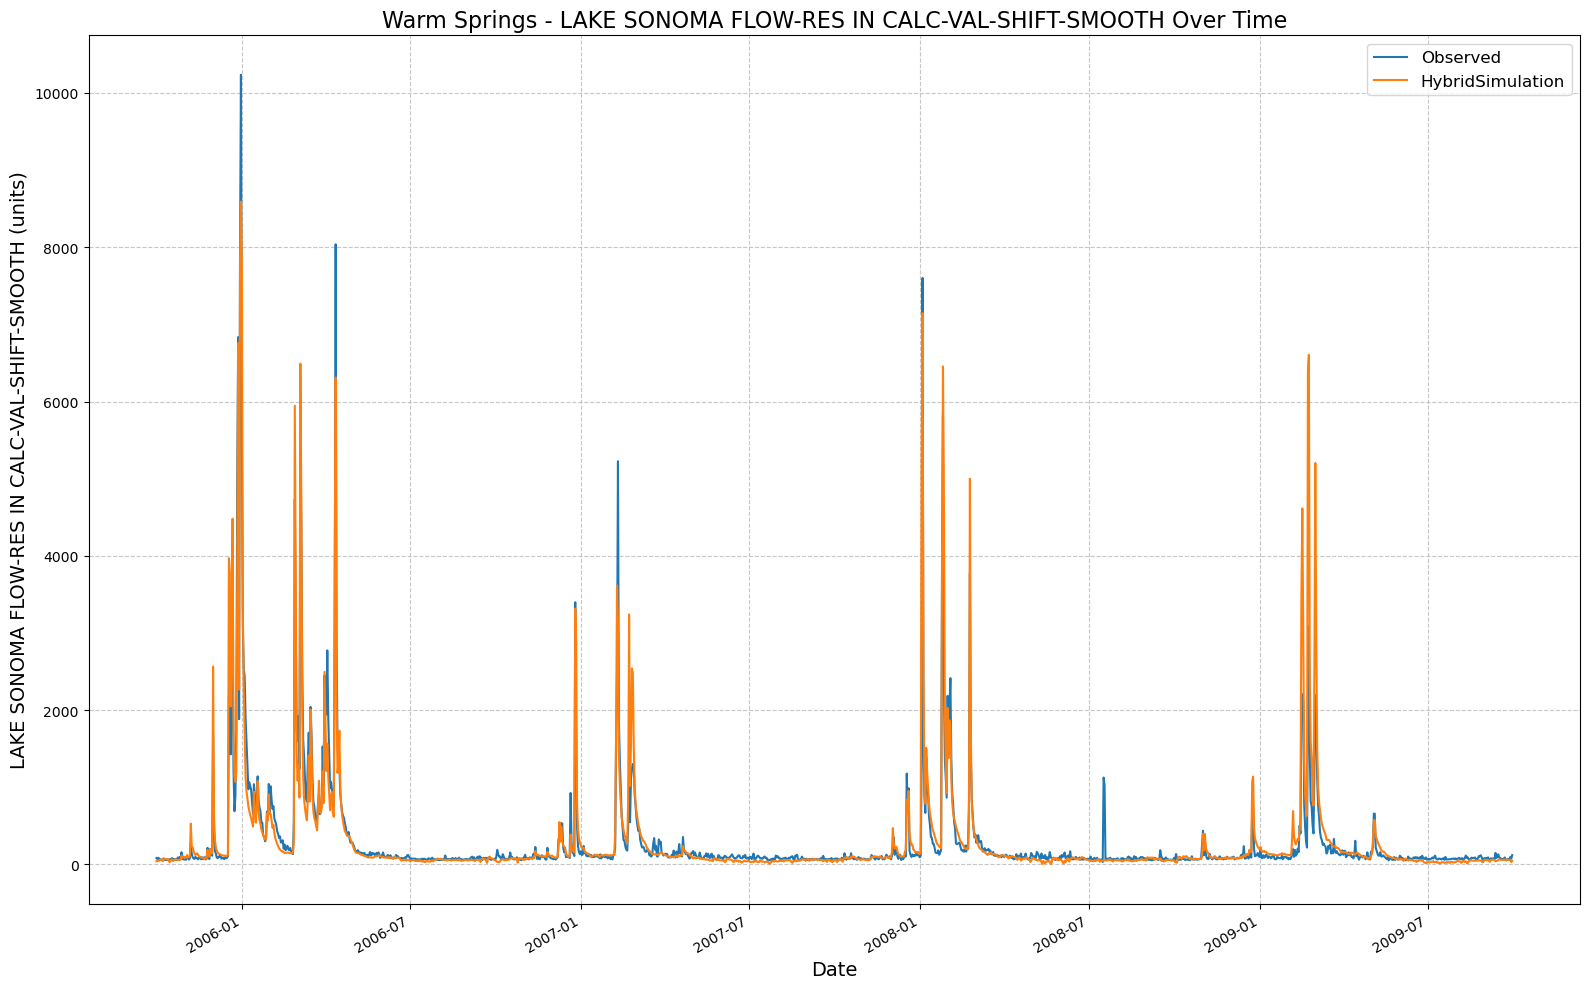

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0812_150119/results_output.csv


{'NSE': 0.8235679119825363,
 'MSE': 94418.421875,
 'RMSE': 307.27580750036276,
 'KGE': 0.8499140360528872,
 'Alpha-NSE': 1.1188748263645396,
 'Beta-KGE': 1.0562858581542969,
 'Beta-NSE': 0.02289067905575683,
 'Pearson-r': 0.9277056405895384,
 'FHV': 18.886111676692963,
 'FMS': 35.88110419196955,
 'FLV': -222.1274198273387,
 'Peak-Timing': 0.3333333333333333,
 'Peak-MAPE': 48.85668357213338}

In [13]:
lstmPhysics.results()

In [24]:
import xarray as xr

Now, combine the results for the normal lstm, physics informed lstm and the hms results on one graph over a specified time period (the test period).

In [27]:
def combinedPlot(lstm_results: Path, lstmPhysics_results: Path, HMS_results: Path, title: str, 
                 test_start_date="01/10/2005", test_end_date="30/09/2009"):
    model1_df = pd.read_csv(lstm_results) #colums: Date, Observed, Predicted
    model2_df = pd.read_csv(lstmPhysics_results) #colums: Date, Observed, Predicted
    model1_df = model1_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model1',
        'Predicted': 'Predicted_Model1'
    })
    model1_df['date'] = pd.to_datetime(model1_df['date'])

    # Set all negative values in the Predicted_Model1 column to zero
    model1_df.loc[model1_df['Predicted_Model1'] < 0, 'Predicted_Model1'] = 0

    model2_df = model2_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model2',
        'Predicted': 'Predicted_Model2'
    })
    model2_df['date'] = pd.to_datetime(model2_df['date'])

    # Set all negative values in the Predicted_Model2 column to zero
    model2_df.loc[model2_df['Predicted_Model2'] < 0, 'Predicted_Model2'] = 0
    
    #This just gets the HMS prediceted values from the capella.csv thy gave us
    hms_df = pd.read_csv(HMS_results)
    hms_df = hms_df[3:]
    hms_df.columns = hms_df.columns.str.strip()
    hms_df = hms_df.drop(columns=['Ordinate'])
    hms_df = hms_df.rename(columns={'Date / Time': 'date'})
    hms_df['date'] = pd.to_datetime(hms_df['date'], format='%d-%b-%y')
    hms_df = hms_df.reset_index(drop=True)
    # hms_df = hms_df.iloc[:, [0,1]] #Date, HMS predicted
    #print(hms_df.columns)
    #hms_df = hms_df.rename(columns={hms_df['Warm Springs Dam Inflow FLOW combined']: "HMS_predicted"})
    hms_df["HMS_predicted"] = pd.to_numeric(hms_df["Warm Springs Dam Inflow FLOW combined"], errors="coerce")

    df = model1_df.merge(model2_df, how='right', on='date').merge(hms_df, how='right', on='date')

    # Filter for the test period
    test_start_date = pd.to_datetime("2005-10-01")
    test_end_date = pd.to_datetime("2009-09-30")
    df = df[(df['date'] >= test_start_date) & (df['date'] <= test_end_date)]

    # Convert pandas Series to xarray DataArray with a datetime coordinate
    obs_da = xr.DataArray(df['Observed_Model1'].values, dims=["date"], coords={"date": df['date']})
    sim_da_hms = xr.DataArray(df['HMS_predicted'].values, dims=["date"], coords={"date": df['date']})
    sim_da_lstm = xr.DataArray(df['Predicted_Model1'].values, dims=["date"], coords={"date": df['date']})
    sim_da_physics = xr.DataArray(df['Predicted_Model2'].values, dims=["date"], coords={"date": df['date']})

    # Collect metrics into a dictionary
    metrics = {
        "HMS": calculate_all_metrics(obs_da, sim_da_hms),
        "LSTM": calculate_all_metrics(obs_da, sim_da_lstm),
        "Physics_Informed_LSTM": calculate_all_metrics(obs_da, sim_da_physics),
    }

    metrics_df = pd.DataFrame(metrics)
    output_csv_path = "warm_springs_metrics.csv"
    metrics_df.to_csv(output_csv_path)

    # Plot all columns against the "date_col" (x-axis)
    plt.figure(figsize=(30, 10))
    
    plt.plot(df["date"], df["Observed_Model1"], label='Observed', linewidth=2) #color="blue",
    plt.plot(df["date"], df["HMS_predicted"], label='HMS Prediction',  linewidth=2, alpha=0.9) #color="lightblue",
    plt.plot(df["date"], df["Predicted_Model1"], label='LSTM Prediction', linewidth=2, alpha=0.9) #color="purple",
    plt.plot(df["date"], df["Predicted_Model2"], label='Physics Informed LSTM Prediction', linewidth=2, alpha=0.9) #color="orange",
    

    # Customize the plot
    plt.tick_params(axis='x', labelsize=15)  # For x-axis tick labels
    plt.tick_params(axis='y', labelsize=15) 
    plt.xlabel("Date", fontsize=20)
    plt.ylabel("Inflow (cubic feet per second)", fontsize=20)
    plt.title(title, fontsize=30)
    plt.legend(fontsize=25, loc="upper right")
    plt.grid(True, alpha=0.4)

    plt.xlim(test_start_date, test_end_date)

    #plt.gcf.autofmt_xdate()
    plt.tight_layout()
    plt.show()

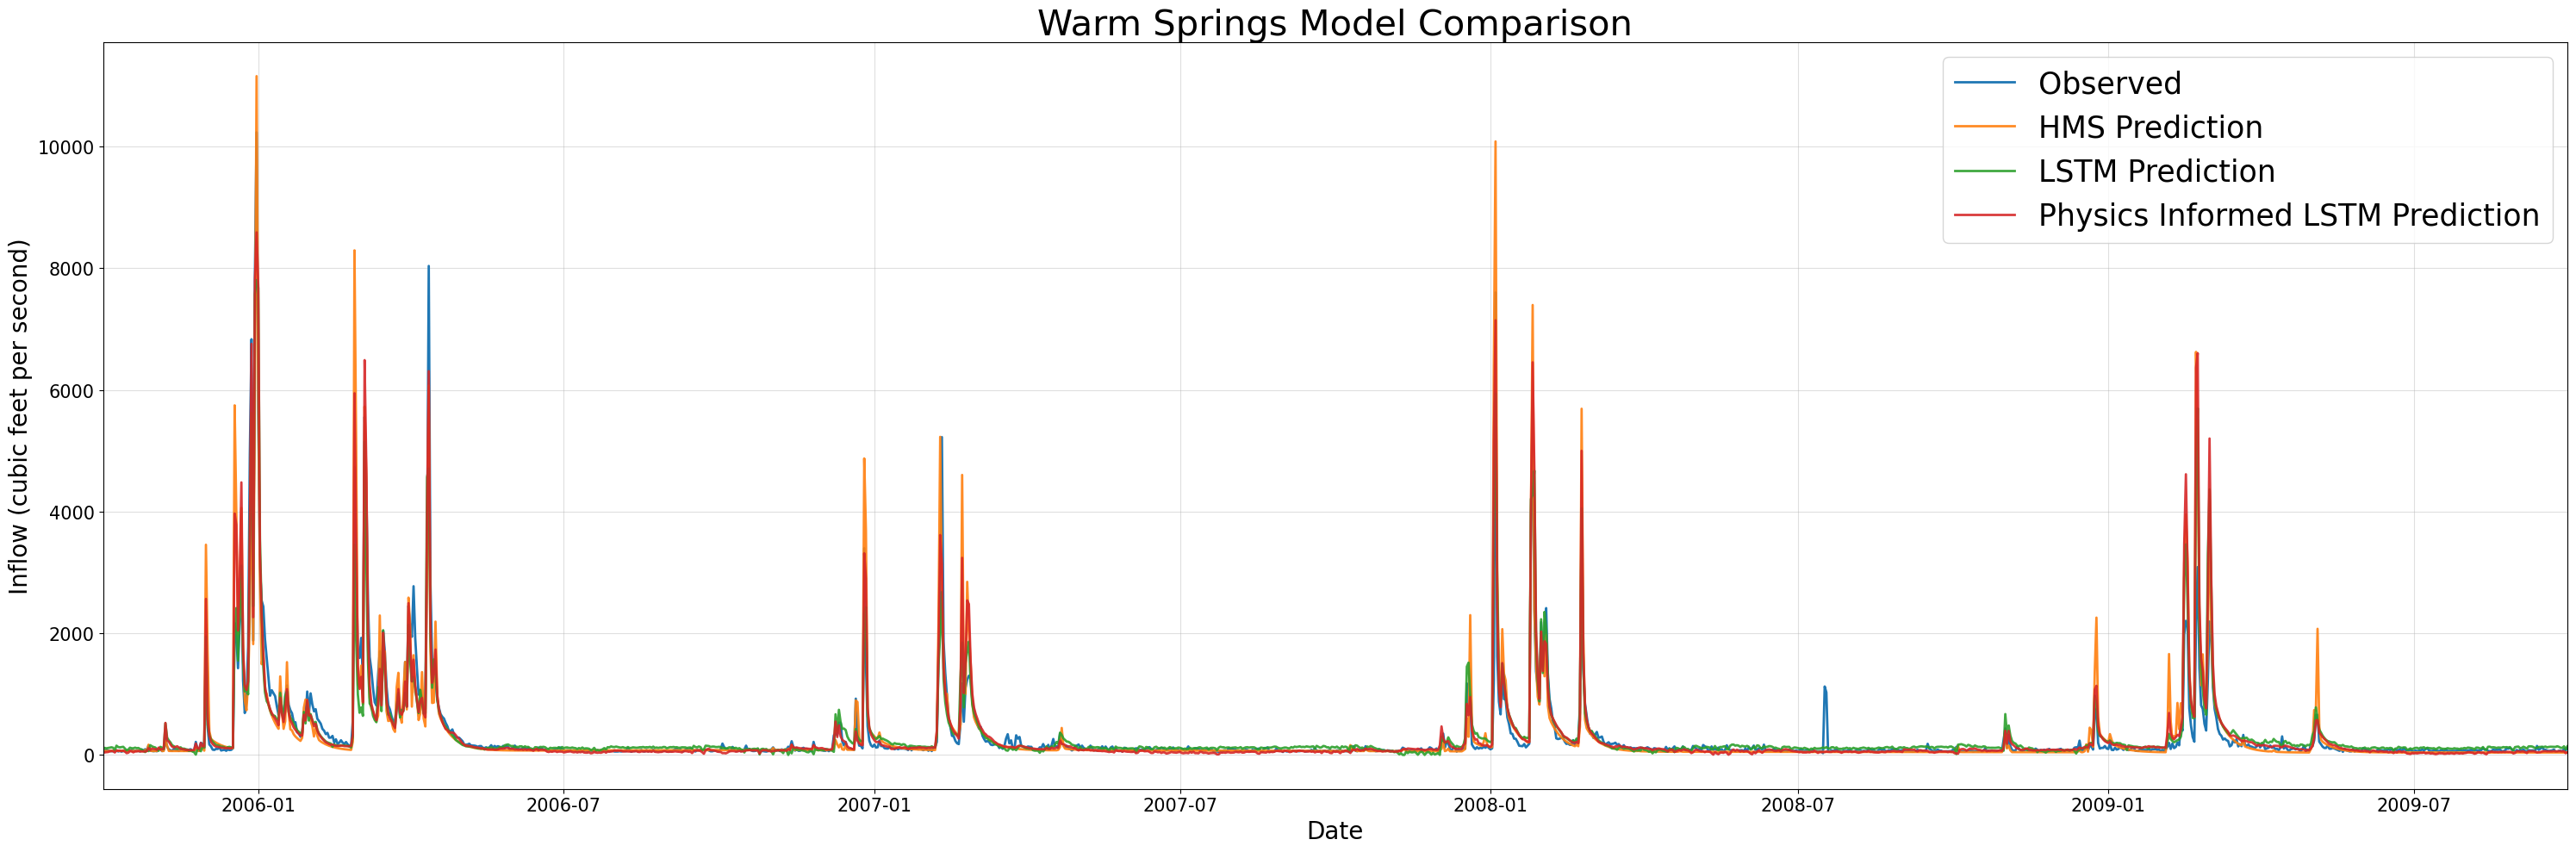

In [28]:
#change the paths to the respective ouptut csvs from running.result()
lstm_result_path = Path('/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0112_153243/results_output.csv')
physics_informed_result_path = Path('/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_0812_150119/results_output.csv')
path_to_physics_data = Path("/Users/mia/research/russian_river_data_folder/WarmSprings_Inflow_daily.csv")
combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Warm Springs Model Comparison')